# Carregando bibliotecas

In [80]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (15,8))

In [2]:
#lendos dados
data = pd.DataFrame(pd.read_csv(r'C:\Users\user\Desktop\Python Files\brasilian-houses-to-rent\houses_to_rent_v2.csv'))

In [3]:
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [4]:
data.shape

(10692, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
city                   10692 non-null object
area                   10692 non-null int64
rooms                  10692 non-null int64
bathroom               10692 non-null int64
parking spaces         10692 non-null int64
floor                  10692 non-null object
animal                 10692 non-null object
furniture              10692 non-null object
hoa (R$)               10692 non-null int64
rent amount (R$)       10692 non-null int64
property tax (R$)      10692 non-null int64
fire insurance (R$)    10692 non-null int64
total (R$)             10692 non-null int64
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [6]:
# counting how many null values has in data
# we see that floor is an object
data.isna().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [7]:
# we see that we have '-' values, and probably some errors we see by floor 301.
data['floor'].unique()

array(['7', '20', '6', '2', '1', '-', '4', '3', '10', '11', '24', '9',
       '8', '17', '18', '5', '13', '15', '16', '14', '26', '12', '21',
       '19', '22', '27', '23', '35', '25', '46', '28', '29', '301', '51',
       '32'], dtype=object)

In [8]:
# so lets see how many is the distribuition for '-' and '301'
# we see that '-' has a lot of values,  
data['floor'].value_counts()

-      2461
1      1081
2       985
3       931
4       748
5       600
6       539
7       497
8       490
9       369
10      357
11      303
12      257
13      200
14      170
15      147
16      109
17       96
18       75
19       53
20       44
21       42
23       25
25       25
22       24
26       20
24       19
27        8
28        6
29        5
32        2
35        1
46        1
301       1
51        1
Name: floor, dtype: int64

In [9]:
# we will transform '-' and '301' to median, but first we have to replace to 0 both of them and them transform to integers
data['floor_num'] = data['floor'].replace(['-','301'], 0)
data['floor_num'].value_counts()

0     2462
1     1081
2      985
3      931
4      748
5      600
6      539
7      497
8      490
9      369
10     357
11     303
12     257
13     200
14     170
15     147
16     109
17      96
18      75
19      53
20      44
21      42
25      25
23      25
22      24
26      20
24      19
27       8
28       6
29       5
32       2
35       1
46       1
51       1
Name: floor_num, dtype: int64

In [10]:
# transforming an object to integer, for this we first convert to str and them to int
data['floor_num'] = data['floor_num'].astype(str).astype(int)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 14 columns):
city                   10692 non-null object
area                   10692 non-null int64
rooms                  10692 non-null int64
bathroom               10692 non-null int64
parking spaces         10692 non-null int64
floor                  10692 non-null object
animal                 10692 non-null object
furniture              10692 non-null object
hoa (R$)               10692 non-null int64
rent amount (R$)       10692 non-null int64
property tax (R$)      10692 non-null int64
fire insurance (R$)    10692 non-null int64
total (R$)             10692 non-null int64
floor_num              10692 non-null int32
dtypes: int32(1), int64(9), object(4)
memory usage: 1.1+ MB


In [12]:
data['floor_num'].value_counts()

0     2462
1     1081
2      985
3      931
4      748
5      600
6      539
7      497
8      490
9      369
10     357
11     303
12     257
13     200
14     170
15     147
16     109
17      96
18      75
19      53
20      44
21      42
25      25
23      25
22      24
26      20
24      19
27       8
28       6
29       5
32       2
35       1
51       1
46       1
Name: floor_num, dtype: int64

In [13]:
# we have to replace the value '0' for the median
median_floor = data['floor_num'].median()
data['floor_num'] = data['floor_num'].replace(0, median_floor)
data['floor_num'].value_counts()

3     3393
1     1081
2      985
4      748
5      600
6      539
7      497
8      490
9      369
10     357
11     303
12     257
13     200
14     170
15     147
16     109
17      96
18      75
19      53
20      44
21      42
25      25
23      25
22      24
26      20
24      19
27       8
28       6
29       5
32       2
51       1
46       1
35       1
Name: floor_num, dtype: int64

In [14]:
data.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),floor_num
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03,5.730640
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04,4.824429
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02,1.000000
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03,3.000000
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03,3.000000
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03,8.000000
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06,51.000000


In [15]:
# lets explore the categorical data
categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)


There are 4 categorical variables

The categorical variables are :

 ['city', 'floor', 'animal', 'furniture']


In [16]:
data['animal'].unique(), data['furniture'].unique(), data['city'].unique()

(array(['acept', 'not acept'], dtype=object),
 array(['furnished', 'not furnished'], dtype=object),
 array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
        'Belo Horizonte'], dtype=object))

In [17]:
# so we have 3 categorical data, we can explore these data here
# view the frequency 
for var in categorical:
    print(data[var].value_counts()/np.float(len(data)))

São Paulo         0.550599
Rio de Janeiro    0.140385
Belo Horizonte    0.117658
Porto Alegre      0.111579
Campinas          0.079779
Name: city, dtype: float64
-      0.230172
1      0.101104
2      0.092125
3      0.087074
4      0.069959
5      0.056117
6      0.050412
7      0.046483
8      0.045829
9      0.034512
10     0.033389
11     0.028339
12     0.024037
13     0.018706
14     0.015900
15     0.013749
16     0.010195
17     0.008979
18     0.007015
19     0.004957
20     0.004115
21     0.003928
23     0.002338
25     0.002338
22     0.002245
26     0.001871
24     0.001777
27     0.000748
28     0.000561
29     0.000468
32     0.000187
35     0.000094
46     0.000094
301    0.000094
51     0.000094
Name: floor, dtype: float64
acept        0.777778
not acept    0.222222
Name: animal, dtype: float64
not furnished    0.756266
furnished        0.243734
Name: furniture, dtype: float64


Text(0.5, 1.0, 'Count of cities')

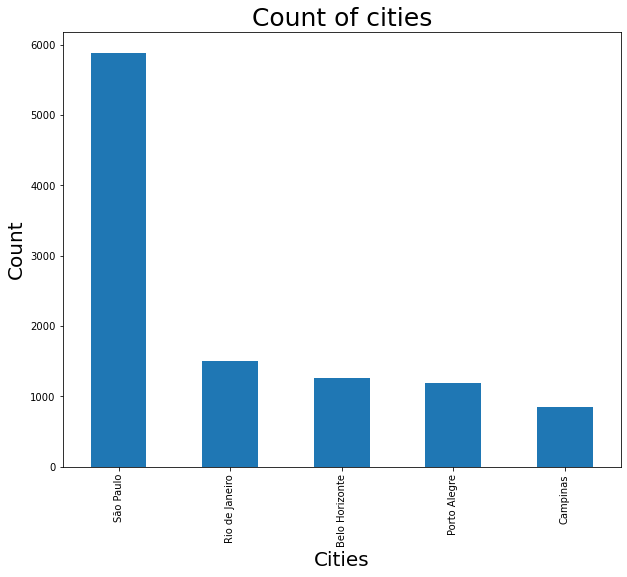

In [18]:
# lets plot the data and see how it goe
ax = data['city'].value_counts().plot(kind='bar',
                                    figsize=(10,8))
ax.set_xlabel('Cities', fontsize = 20)
ax.set_ylabel('Count', fontsize = 20)
ax.set_title('Count of cities', fontsize = 25)
                                

Text(0, 0.5, 'Quantitiy of houses')

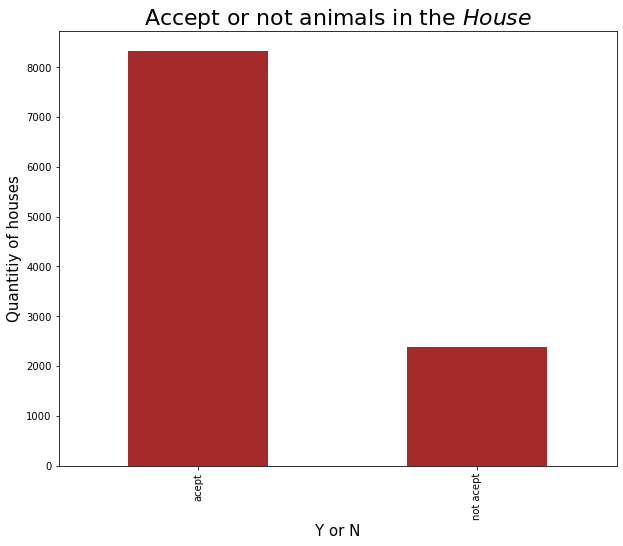

In [19]:
ax = data['animal'].value_counts().plot(kind = 'bar',
                                       figsize = (10,8),
                                       color = 'brown')
ax.set_title('Accept or not animals in the $House$', fontsize = 22)
ax.set_xlabel('Y or N', fontsize = 15)
ax.set_ylabel('Quantitiy of houses' , fontsize = 15)



Text(0, 0.5, 'Quantitiy of houses')

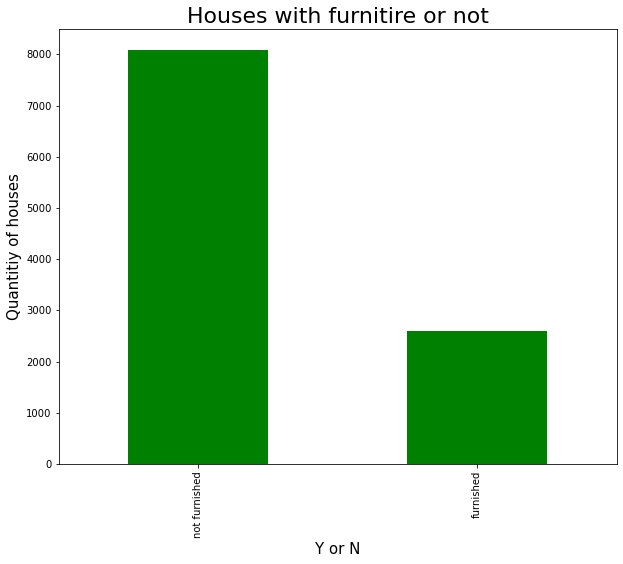

In [20]:
ax = data['furniture'].value_counts().plot(kind = 'bar',
                                       figsize = (10,8),
                                       color = 'green')
ax.set_title('Houses with furnitire or not', fontsize = 22)
ax.set_xlabel('Y or N', fontsize = 15)
ax.set_ylabel('Quantitiy of houses' , fontsize = 15)



In [21]:
# now we are going to explore numerical data.
numerical = [var for var in data.columns if data[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 10 numerical variables

The numerical variables are : ['area', 'rooms', 'bathroom', 'parking spaces', 'hoa (R$)', 'rent amount (R$)', 'property tax (R$)', 'fire insurance (R$)', 'total (R$)', 'floor_num']


In [23]:
data.describe()
         

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),floor_num
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03,5.730640
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04,4.824429
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02,1.000000
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03,3.000000
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03,3.000000
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03,8.000000
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06,51.000000


## Checking boxplot 


In [30]:
data['total (R$)'].max()

1120000

In [34]:
(data['total (R$)'].describe()).round(2)

count      10692.00
mean        5490.49
std        16484.73
min          499.00
25%         2061.75
50%         3581.50
75%         6768.00
max      1120000.00
Name: total (R$), dtype: float64

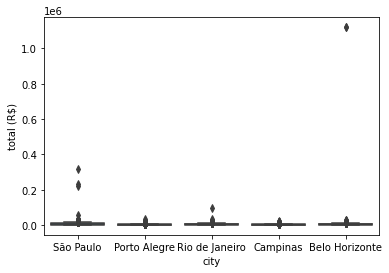

In [37]:
# boxplot
# we can look that there are a lot of outliers in this data
sns.boxplot(x = 'city', y ='total (R$)', data = data)

In [41]:
# let's remove the outliers just to make sure that we have GOOD data for the analysis
city_group = data.groupby('city')['total (R$)']

In [42]:
type(city_group)

pandas.core.groupby.generic.SeriesGroupBy

In [45]:
Q1 = city_group.quantile(.25)
Q3 = city_group.quantile(.75)
IIQ = Q3 - Q1  #interquartile range
lower_limit = Q1 - 1.5* IIQ
upper_limit = Q3 + 1.5* IIQ

In [50]:
# checking if its ok
print('Q1 Result is ',  Q1)

Q1 Result is  city
Belo Horizonte    1611.25
Campinas          1417.00
Porto Alegre      1465.00
Rio de Janeiro    2067.00
São Paulo         2631.00
Name: total (R$), dtype: float64


In [51]:
print('Q3 Result is ',  Q3)

Q3 Result is  city
Belo Horizonte    5925.75
Campinas          3632.00
Porto Alegre      3338.00
Rio de Janeiro    5566.00
São Paulo         8591.00
Name: total (R$), dtype: float64


In [61]:
## seems to be working these values..
# now lets remove the outliers by group city
data_new = pd.DataFrame()

for city in city_group.groups.keys():
        is_city = data['city'] == city
        accept_limit = (data['total (R$)'] >= lower_limit[city]) & (data['total (R$)'] <= upper_limit[city])
        select = is_city & accept_limit
        data_select = data[select]
        data_new = pd.concat([data_new, data_select])

In [62]:
data_new

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),floor_num
21,Belo Horizonte,42,1,1,1,17,not acept,furnished,470,2690,172,36,3368,17
27,Belo Horizonte,64,2,2,1,11,acept,not furnished,352,1500,80,20,1952,11
37,Belo Horizonte,80,3,2,1,-,acept,not furnished,0,11000,425,181,11610,3
42,Belo Horizonte,200,4,2,1,7,not acept,not furnished,850,2550,9,34,3443,7
43,Belo Horizonte,45,1,1,1,5,acept,not furnished,500,1631,192,12,2335,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10681,São Paulo,230,3,5,3,3,not acept,not furnished,3800,11000,1100,140,16040,3
10683,São Paulo,280,4,4,2,5,acept,not furnished,4200,4000,1042,51,9293,5
10685,São Paulo,83,3,2,2,11,acept,not furnished,888,7521,221,96,8726,11
10686,São Paulo,150,3,3,2,8,not acept,furnished,0,13500,0,172,13670,8


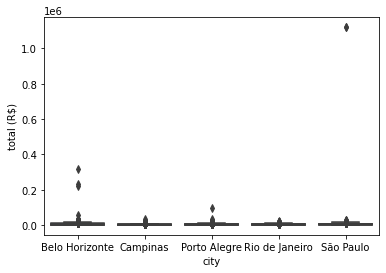

In [66]:
sns.boxplot(x = 'city', y ='total (R$)', data = data)


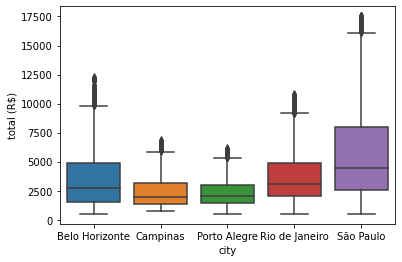

In [67]:
sns.boxplot(x = 'city', y ='total (R$)', data = data_new)

Now that we finished cleaning the data. We observe that São paulo has a lot dispersion from their values, in addition their values cost higher than other cities
We can assume that because its median its a little higher from other cities.

Belo Horizonte its really nice to see the  because it's a city that is growing up really fast, and i would say that the second city with most companies and startups is Belo Horizonte behind São Paulo. Not really surprising at all.

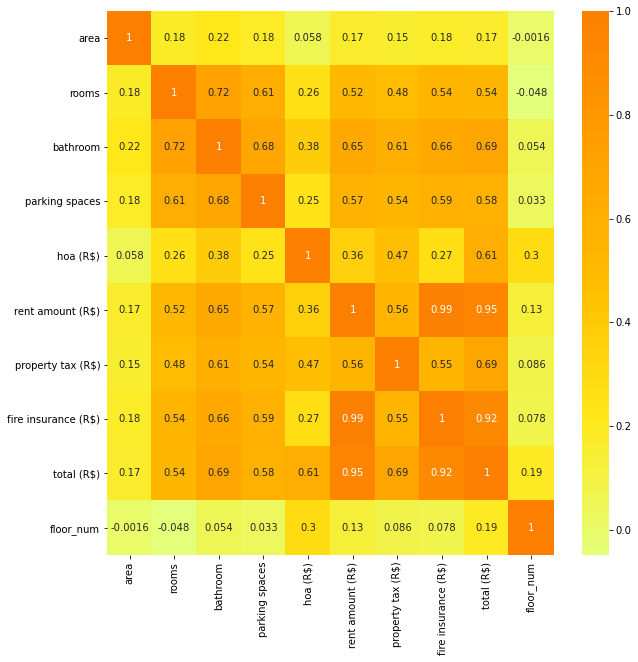

In [69]:
# now we are going to explore numerical data.
# correlation plot
fig = plt.figure(figsize=(10,10))
corr = data_new.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

In [81]:
# i will make a scatter plot for each variable that has a good correlation with total (R$)
area = plt.figure()

<Figure size 1080x576 with 0 Axes>

In [82]:
g1 = area.add_subplot(2,2,1)
g2 = area.add_subplot(2,2,2)
g3 = area.add_subplot(2,2,3)
g4 = area.add_subplot(2,2,4)


In [89]:
## Lets check scatter plot total (R$) with fire insurance, property tax(R$), rent amount (R$),bathroom
g1.scatter(data_new['fire insurance (R$)'], data_new['total (R$)'])
g1.set_title('Fire insurance x total')


g2.scatter(data_new['property tax (R$)'], data_new['total (R$)'])
g2.set_title('property x total')
g3.scatter(data_new['rent amount (R$)'], data_new['total (R$)'])
g3.set_title('rent R$ x total')
g4.scatter(data_new['bathroom'], data_new['total (R$)'])
g4.set_title('bathrooms x total')

Text(0.5, 1.0, 'bathrooms x total')

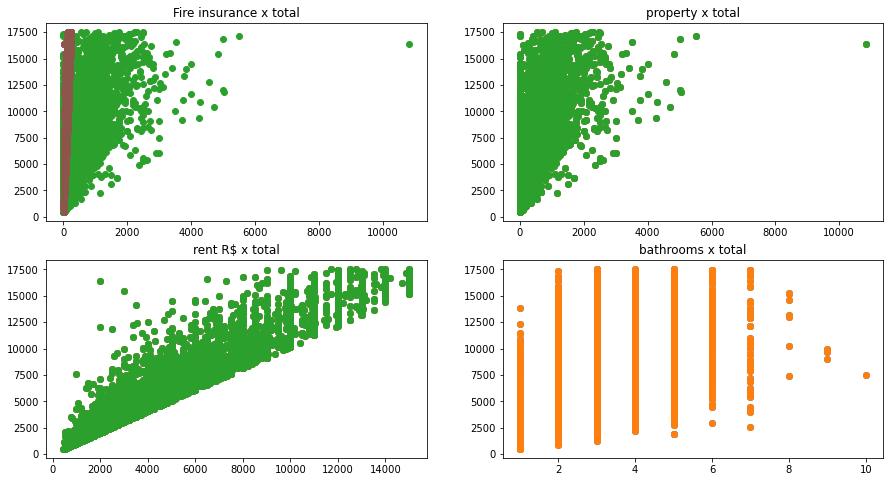

In [90]:
area

## Well thats obvious, if we pay more taxes logically we pay more in total amount. I don't really know that it is a good observation, maybe try to put different variables like rooms, etc


## for now i will end and probably in the future i will put a regression analysis here.